In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [343]:
df= pd.read_csv('Nike_Sales_Uncleaned.csv')

In [344]:
df.head()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,2024-07-09,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,04-10-2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,2024/09/12,Retail,Delhi,187.89


In [345]:
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2495,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,2025-05-14,Online,Pune,2.97
2496,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2497,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,02-07-2025,Retail,Bangalore,-918.14
2498,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.70,NaN,0.0,11-12-2024,Online,Mumbai,3352.29
2499,4499,Women,Running,Air Zoom,M,NaN,5550.99,NaN,0.0,23-11-2024,Retail,Mumbai,2453.57


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2500 non-null   int64  
 1   Gender_Category   2500 non-null   object 
 2   Product_Line      2500 non-null   object 
 3   Product_Name      2500 non-null   object 
 4   Size              1990 non-null   object 
 5   Units_Sold        1265 non-null   float64
 6   MRP               1246 non-null   float64
 7   Discount_Applied  832 non-null    float64
 8   Revenue           2500 non-null   float64
 9   Order_Date        1884 non-null   object 
 10  Sales_Channel     2500 non-null   object 
 11  Region            2500 non-null   object 
 12  Profit            2500 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 254.0+ KB


In [347]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2500.000000,1265.000000,1246.000000,832.000000,2500.000000,2500.000000
mean,3194.352400,1.482213,6039.863395,0.631022,274.873716,1376.012848
std,749.972638,1.696947,2315.746826,0.365500,2023.773550,1478.671013
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.450000
25%,2534.750000,0.000000,4038.902500,0.320000,0.000000,93.532500
50%,3192.500000,2.000000,6110.030000,0.615000,0.000000,1371.385000
75%,3841.250000,3.000000,8022.187500,0.962500,0.000000,2660.645000
max,4499.000000,4.000000,9996.220000,1.250000,37169.350000,3999.210000


In [348]:
#handling incorrect data type
#filling  missing values
#handling negative values

df['Order_Date']= df['Order_Date'].astype('datetime64[ns]').ffill()

df['Units_Sold_Positive']=df['Units_Sold'].clip(lower=0).fillna(0).astype('int')

df['Units_Returned']=df[df['Units_Sold']<0]['Units_Sold'].abs()
df['Units_Returned']=df['Units_Returned'].fillna(0).astype('int')
# dropping unit_sold
df=df.drop(columns='Units_Sold', axis=1)

df['Discount_Applied']= df['Discount_Applied'].fillna(0)

df['Loss']= df[df['Profit']<0]['Profit'].abs()
df['Loss']=df['Loss'].fillna(0)

df['Profit']=df['Profit'].clip(lower=0)

#df=df.drop(columns='Units_Sold', axis=1)

df['MRP'] = df['MRP'].fillna(
    df.groupby('Product_Line')['MRP'].transform('mean').round(2)
)

df['Size'] = df['Size'].fillna(
    df.groupby('Product_Line')['Size'].transform(lambda x: x.mode()[0]))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_ID             2500 non-null   int64         
 1   Gender_Category      2500 non-null   object        
 2   Product_Line         2500 non-null   object        
 3   Product_Name         2500 non-null   object        
 4   Size                 2500 non-null   object        
 5   MRP                  2500 non-null   float64       
 6   Discount_Applied     2500 non-null   float64       
 7   Revenue              2500 non-null   float64       
 8   Order_Date           2500 non-null   datetime64[ns]
 9   Sales_Channel        2500 non-null   object        
 10  Region               2500 non-null   object        
 11  Profit               2500 non-null   float64       
 12  Units_Sold_Positive  2500 non-null   int64         
 13  Units_Returned       2500 non-nul

In [349]:
#consistency in date time

df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Region']= df['Region'].str.title()
df['Region']=df['Region'].replace(['Hyd','Hyderabad','hyderbad','Hyderbad'],'Hyderabad')
df['Region'].unique()

array(['Bengaluru', 'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Bangalore',
       'Kolkata'], dtype=object)

In [350]:
df['Discount_Applied'] = df['Discount_Applied'].apply(lambda x: f"{x:.2f}")

df['Discount_Applied']=df['Discount_Applied'].astype(float)
df['Discount_Applied'].value_counts().sort_values(ascending=False)

,count
Discount_Applied,
0.00,1672
0.90,14
1.06,13
1.02,13
0.32,12
...,...
0.44,3
0.79,2
0.91,2


In [351]:
df['Product_Line'].value_counts()

,count
Product_Line,
Training,546
Basketball,507
Lifestyle,501
Running,474
Soccer,472


In [352]:
df.groupby('Product_Line')['Size'].value_counts()


Product_Line  Size
Basketball    XL      228
              L       109
              M        85
              11       17
              10       14
              6        13
              12       12
              9        11
              7        10
              8         8
Lifestyle     L       213
              XL      107
              M        84
              7        18
              9        18
              10       13
              11       13
              6        13
              8        12
              12       10
Running       L       205
              XL       91
              M        85
              7        19
              10       17
              11       12
              6        12
              8        12
              12       11
              9        10
Soccer        M       207
              XL       85
              L        81
              7        20
              10       17
              9        15
              8        14
              11       12
              12       12
              6         9
Training      M       232
              XL      104
              L        97
              11       23
              7        19
              12       16
              10       15
              8        14
              9        14
              6        12
Name: count, dtype: int64

In [353]:
#Setting Revenue to 0, if the unit is returned

df.loc[(df['Units_Returned'] == 0) & (df['Revenue'] < 0), 'Revenue'] = 0

In [354]:
#flagging outliers in 'Revenue, Profit, Loss and MRP' columns

def flag_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[f'{col}_outlier'] = ~df[col].between(lower, upper)
    df[f'{col}_outlier'] = df[f'{col}_outlier'].astype(int)

# Apply to multiple columns
for col in ['MRP','Revenue', 'Profit', 'Loss']:
    flag_outliers_iqr(df, col)

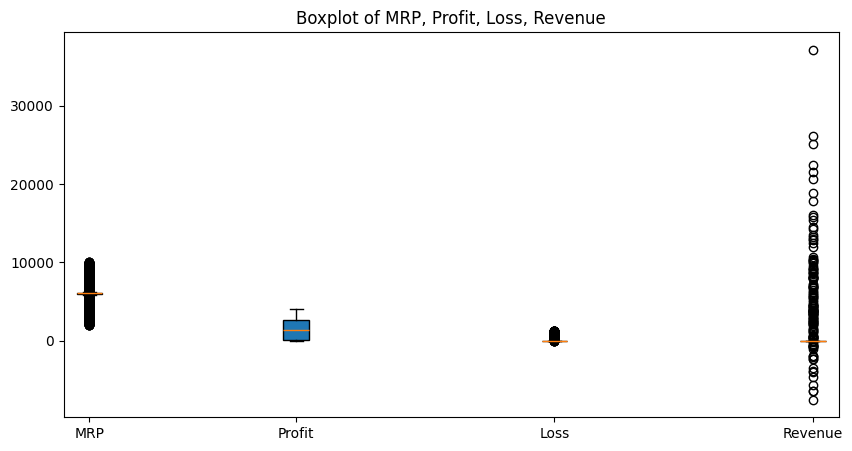

In [355]:
# finding outliers


plt.figure(figsize=(10,5))
plt.boxplot([df['MRP'],df['Profit'],df['Loss'] ,df['Revenue']],positions=[1,5,10,15],patch_artist=True)
#plt.xlim(right=7000, left=0)
plt.title('Boxplot of MRP, Profit, Loss, Revenue')

plt.xticks([1,5,10,15], ['MRP', 'Profit', 'Loss','Revenue'])
ymin, ymax = plt.ylim()

# Set ticks every 500 units (adjust step as needed)
#plt.yticks(np.arange(ymin, ymax, 500))
plt.show()

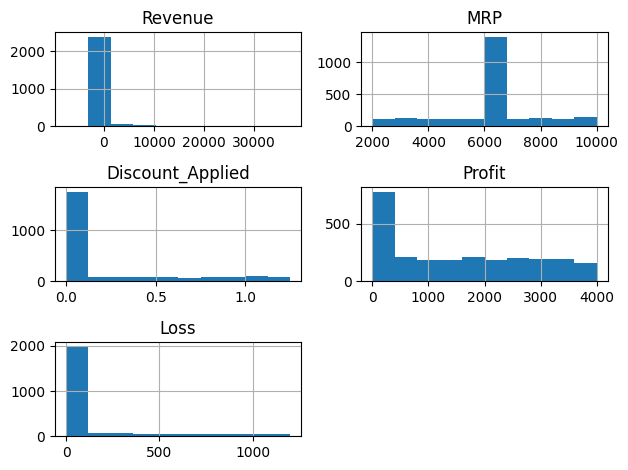

In [356]:
df[['Revenue','MRP','Discount_Applied','Profit','Loss']].hist()
plt.tight_layout()
plt.show()


In [357]:
df.select_dtypes(include=['number']).corr()['MRP']

,MRP
Order_ID,-0.035489
MRP,1.000000
Discount_Applied,0.042300
Revenue,0.053488
Profit,-0.031869
Units_Sold_Positive,-0.017924
Units_Returned,-0.006522
Loss,0.022003
MRP_outlier,-0.000813
Revenue_outlier,0.002433


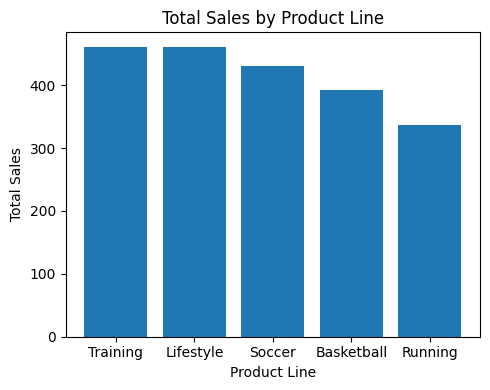

In [358]:
product_sales=df.groupby('Product_Line')['Units_Sold_Positive'].sum()
product_sales.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(5,4))
plt.bar(product_sales.index,product_sales.values)
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product Line')
plt.tight_layout()
plt.show()

In [359]:
# Convert 'Size' to numeric, coercing errors to handle non-numeric values
numeric_size = pd.to_numeric(df['Size'], errors='coerce')

# Define bins and labels for categorization (example bins, you might need to adjust these)
# Let's assume numeric sizes 7-9 are 'M', 10-11 are 'L', and 12 are 'XL'
bins = [6, 9, 11, 12] # Define bin edges. The rightmost edge is inclusive by default.
labels = ['M', 'L', 'XL']

# Apply pd.cut to the numeric size column
df['Size_Category'] = pd.cut(numeric_size, bins=bins, labels=labels, right=True)

# Display the value counts of the new Size_Category column
display(df['Size_Category'].value_counts())

,count
Size_Category,
M,214
L,153
XL,61


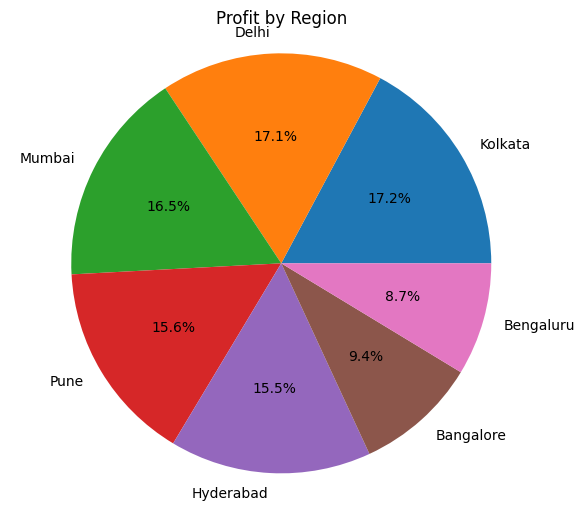

In [360]:
region_profit=df.groupby('Region')['Profit'].sum()
region_profit.sort_values(ascending=False,inplace=True)
plt.figure(figsize=(7,6))
plt.pie(region_profit,labels=region_profit.index,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Profit by Region')

plt.show()

In [361]:
channel_revenue= df.groupby('Sales_Channel')['Revenue'].sum()
channel_revenue

,Revenue
Sales_Channel,
Online,395151.23
Retail,348458.02


<Figure size 500x400 with 0 Axes>

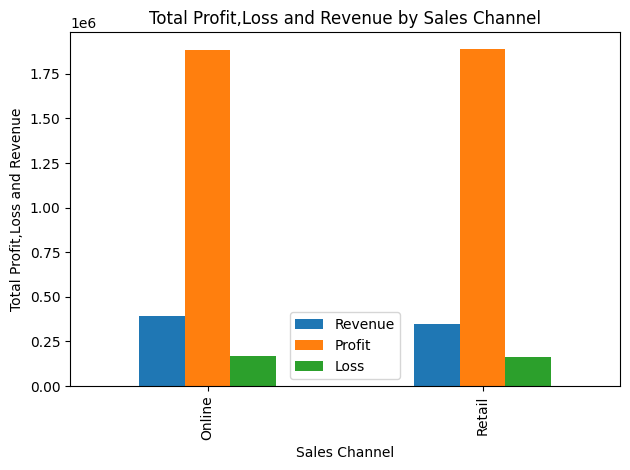

In [362]:
bar=df.groupby('Sales_Channel')[['Revenue','Profit','Loss']].sum()
plt.figure(figsize=(5,4))
bar.plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Total Profit,Loss and Revenue')
plt.title('Total Profit,Loss and Revenue by Sales Channel')
plt.tight_layout()
plt.show()

In [363]:
sales_channel_comparison = df.groupby('Sales_Channel')['Gender_Category'].value_counts().unstack()
print(sales_channel_comparison)

Gender_Category  Kids  Men  Women
Sales_Channel                    
Online            424  430    401
Retail            417  410    418


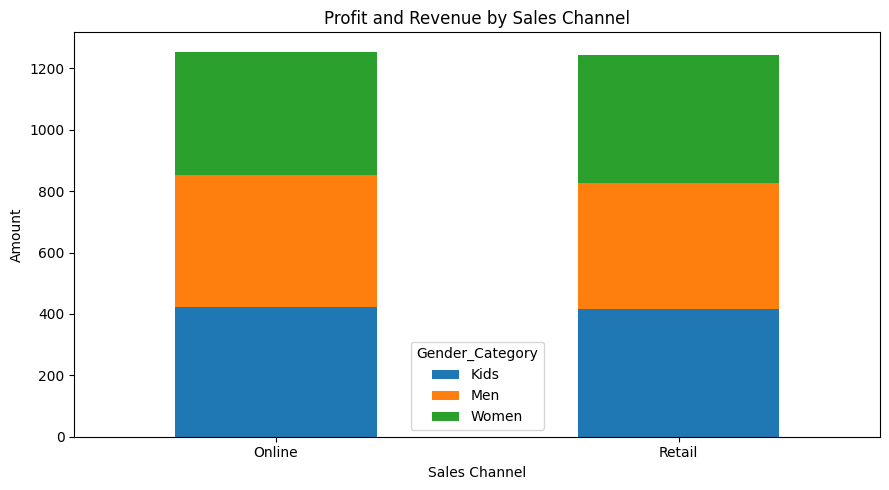

In [364]:
sales_channel_comparison.plot(kind='bar',stacked=True, figsize=(9, 5))
plt.title('Profit and Revenue by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()